# Analysing order of tests

In [2]:
foldpath ='/Users/emiliedolne/Downloads/results'

In [3]:
import pickle
import matplotlib as plt
import os
from utils.basie_class import *
from scipy.stats import ttest_ind


In [4]:
listpatient=[]
for fold in os.listdir(foldpath):
    if '.DS_Store' not in fold:
        listpatient.append(fold)
        

timingmatrix=[]
conditionmatrix=[]
estimatematrix=[]
for iPatient in listpatient:
    foldpathdeep=os.path.join(foldpath, iPatient)
    listconditions=[]
    for fold in os.listdir(foldpathdeep):
        if iPatient in fold:
            listconditions.append(fold)
            
    conditionnames=[]
    timinglist=[]
    estimatelist=[]
    for condition in listconditions:
        conditionnames.append(condition.split(iPatient)[-1])
        for path, subdirs, files in os.walk(os.path.join(foldpathdeep,condition)):
            for name in files:
                if 'pkl' in name:
                    if 'paused' in name:
                        print(f'Warning: {iPatient} took a pause in {conditionnames[-1]}')
                    else:
                        timinglist.append(path.split('/')[-1])
                        with open(os.path.join(path,name), 'rb') as f:
                            [estimate, __, __, __, __]=pickle.load(f)
                            estimatelist.append(estimate)
    conditionmatrix.append(conditionnames)
    timingmatrix.append(timinglist)
    estimatematrix.append(estimatelist)


## Plot the mean variance per room

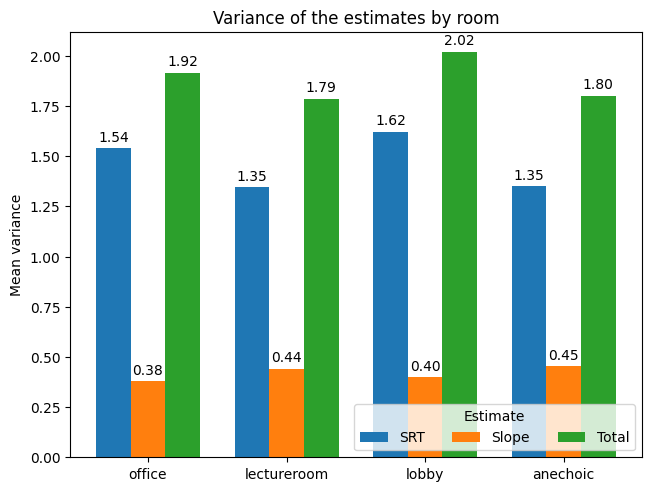

TtestResult(statistic=0.8463914864650286, pvalue=0.20709535828151576, df=11.785134981481638)


In [46]:
roomlist=['office', 'lectureroom', 'lobby', 'anechoic']

varmatrix=[]

srtvar=[]
slopevar=[]
for iroom in range(len(roomlist)):
    srtvarlist=[]
    slopevarlist=[]
    for ipatient in range(len(listpatient)):
        idx=[i for i in range(len(conditionmatrix[ipatient])) if roomlist[iroom] in conditionmatrix[ipatient][i]]
        for i in idx:
            srtvarlist.append(estimatematrix[ipatient][i].summary()[-1][-1][5])
            slopevarlist.append(estimatematrix[ipatient][i].summary()[-1][-1][6])
    srtvar.append(srtvarlist)
    slopevar.append(slopevarlist)

    
# mean variance for SRT and slope, and total
srtmeanvar=[np.mean(i) for i in srtvar]
slopemeanvar=[np.mean(i) for i in slopevar]
totalvar=np.add(srtmeanvar,slopemeanvar)

# plot things
toplot=[srtmeanvar, slopemeanvar, totalvar]
labelstoplot=['SRT', 'Slope', 'Total']

fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(roomlist))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for i in range(3):
    offset = width * multiplier
    rects = ax.bar(x + offset, toplot[i], width, label=labelstoplot[i])
    ax.bar_label(rects, padding=3, fmt='%.2f')
    multiplier += 1


ax.set_ylabel('Mean variance')
ax.set_title('Variance of the estimates by room')
ax.legend(title='Estimate',loc='lower right', ncol=3)
ax.set_xticks(x + width, roomlist)

plt.show()
res = ttest_ind(srtvar[0], srtvar[3], equal_var=False, alternative='greater')
print(res)

# Plot mean variance by order of test

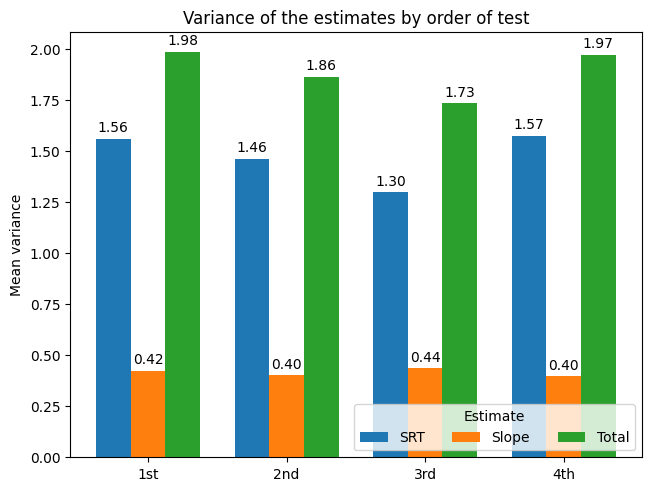

TtestResult(statistic=1.045859206122816, pvalue=0.15689355109853453, df=13.655202033157503)


In [51]:
timelist=['1st', '2nd', '3rd', '4th']

varmatrix=[]

srtvar=[]
slopevar=[]
for timeid in range(len(timelist)):
    srtvarlist=[]
    slopevarlist=[]
    for ipatient in range(len(listpatient)):
        ab = zip(timingmatrix[ipatient],estimatematrix[ipatient])
        C=sorted(ab, key=lambda x: x[0], reverse=False)
        A = [C[i][0] for i in range(len(C))]
        B = [C[i][1] for i in range(len(C))]
        srtvarlist.append(B[timeid].summary()[-1][-1][5])
        slopevarlist.append(B[timeid].summary()[-1][-1][6])
    srtvar.append(srtvarlist)
    slopevar.append(slopevarlist)

# mean variance for SRT and slope, and total
srtmeanvar=[np.mean(i) for i in srtvar]
slopemeanvar=[np.mean(i) for i in slopevar]
totalvar=np.add(srtmeanvar,slopemeanvar)

# plot things
toplot=[srtmeanvar, slopemeanvar, totalvar]
labelstoplot=['SRT', 'Slope', 'Total']

fig, ax = plt.subplots(layout='constrained')
x = np.arange(len(roomlist))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for i in range(3):
    offset = width * multiplier
    rects = ax.bar(x + offset, toplot[i], width, label=labelstoplot[i])
    ax.bar_label(rects, padding=3, fmt='%.2f')
    multiplier += 1

ax.set_ylabel('Mean variance')
ax.set_title('Variance of the estimates by order of test')
ax.legend(title='Estimate',loc='lower right', ncol=3)
ax.set_xticks(x + width, timelist)

plt.show()
res = ttest_ind(srtvar[0], srtvar[2], equal_var=False, alternative='greater')
print(res)